In [41]:

'''
    Dataset cats dogs pandas: là một bộ dataset dữ liệu ảnh động vật bao gồm 2200 ảnh
    1000 cat, 1000 dog và 200 panda
    https://www.kaggle.com/datasets/vuminhhoangg/cats-dogs-pandas

'''

'\n    Dataset cats dogs pandas: là một bộ dataset dữ liệu ảnh động vật bao gồm 2200 ảnh\n    1000 cat, 1000 dog và 200 panda\n    https://www.kaggle.com/datasets/vuminhhoangg/cats-dogs-pandas\n\n'

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import os
import cv2

In [43]:
import os
import cv2
import numpy as np

data_dir = '/kaggle/input/cats-dogs-pandas/train'

def load_images(folder, target_size=(128, 128), max_images=None):
    images = []
    count = 0
    for filename in os.listdir(folder):
        if max_images is not None and count >= max_images:
            break
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # Đọc ảnh bằng OpenCV
        img_resized = cv2.resize(img, target_size)  # Resize ảnh
        if img_resized.shape == (target_size[1], target_size[0], 3):  # Kiểm tra kích thước ảnh
            images.append(img_resized.flatten())  # Flatten ảnh và thêm vào danh sách
            count += 1
    return np.array(images)

# Mỗi loài lấy đại diện 200 mẫu để dễ tính toán
cats_images = load_images(os.path.join(data_dir, 'cats'), max_images=200)
dogs_images = load_images(os.path.join(data_dir, 'dogs'), max_images=200)
pandas_images = load_images(os.path.join(data_dir, 'pandas'), max_images=200)


# 0 là cat, 1 là dog, 2 là panda
X = np.concatenate((cats_images, dogs_images, pandas_images))
y = np.concatenate((np.zeros(len(cats_images)), np.ones(len(dogs_images)), np.ones(len(pandas_images)) * 2))


In [44]:
X.shape

(600, 49152)

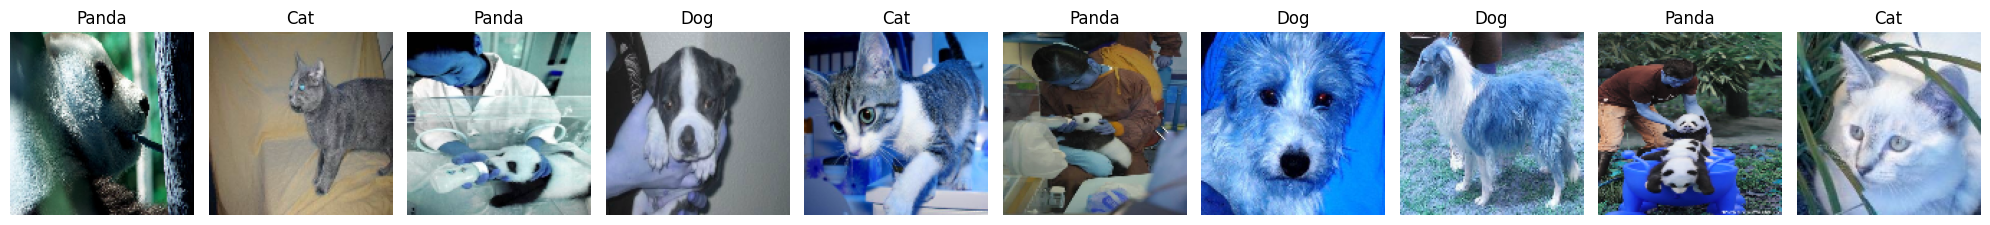

In [45]:
num = 10
random_indices = np.random.choice(len(X), num, replace=False)
fig, axes = plt.subplots(1, num, figsize=(20, 4))

for i, idx in enumerate(random_indices):
    img = X[idx].reshape((128, 128, 3))  
    axes[i].imshow(img)
    axes[i].axis('off')  

    label = y[idx]
    if label == 0:
        label_name = 'Cat'
    elif label == 1:
        label_name = 'Dog'
    elif label == 2:
        label_name = 'Panda'
    else:
        label_name = 'Unknown'
    
    axes[i].set_title(label_name)
    
plt.tight_layout()
plt.show()


In [46]:
'''
    Kết quả dự đoán sẽ thấp vì số lượng dữ liệu khá ít
    Notebook chỉ nhằm mang tính chất minh họa kết quả
'''

'\n    Kết quả dự đoán sẽ thấp vì số lượng dữ liệu khá ít\n    Notebook chỉ nhằm mang tính chất minh họa kết quả\n'

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Decision Tree Accuracy: 0.47
              precision    recall  f1-score   support

         0.0       0.67      0.52      0.58        27
         1.0       0.16      0.23      0.19        13
         2.0       0.55      0.55      0.55        20

    accuracy                           0.47        60
   macro avg       0.46      0.43      0.44        60
weighted avg       0.52      0.47      0.49        60



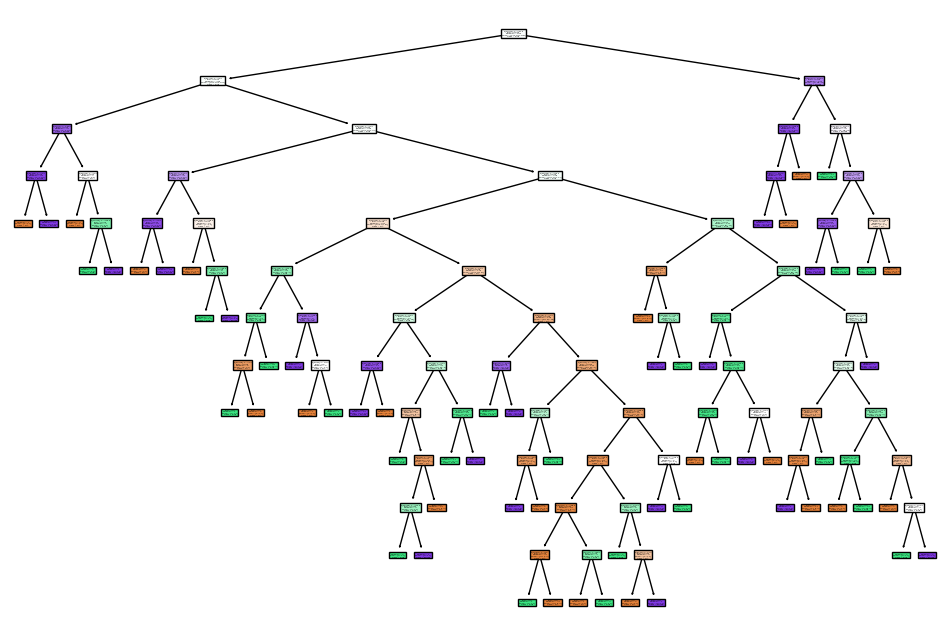

In [48]:


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

dt_predictions = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(classification_report(y_test, dt_predictions))

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, class_names=['Cat', 'Dog', 'Panda'], feature_names=None)
plt.show()

In [49]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.57
              precision    recall  f1-score   support

         0.0       0.67      0.37      0.48        27
         1.0       0.35      0.69      0.46        13
         2.0       0.79      0.75      0.77        20

    accuracy                           0.57        60
   macro avg       0.60      0.60      0.57        60
weighted avg       0.64      0.57      0.57        60



In [50]:
'''
    Ta có thể thấy kết quả của random forest tốt hơn decision tree

'''

'\n    Ta có thể thấy kết quả của random forest tốt hơn decision tree\n\n'